In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

Number of instances 20000
Number of Attributes 8 numeric
Target 
the target variable is the median house value in units of 100000 for california districts

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state =42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(30,activation ="relu",input_shape =[8]),
keras.layers.Dense(30,activation ="relu"),
keras.layers.Dense(1)
]
)

In [ ]:
model.compile(loss ="mean_squared_error",optimizer = keras.optimizers.SGD(lr=1e-3), metrics = ['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(X_train, y_train,epochs =20 ,validation_data =(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss ="mean_squared_error",optimizer = keras.optimizers.SGD(lr =1e-3),metrics = ['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(X_train,y_train ,epochs =20 ,validation_data =(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3596 - mae: 0.4269


In [ ]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992694377899,
  0.38511765003204346,
  0.3828714191913605,
  0.3807542324066162,
  0.3787873089313507,
  0.37684252858161926,
  0.37485167384147644,
  0.3732492923736572,
  0.37154120206832886,
  0.3699616491794586,
  0.36844807863235474,
  0.3671078085899353,
  0.3658640384674072,
  0.364767462015152,
  0.36347660422325134,
  0.36217090487480164,
  0.3612859845161438],
 'mae': [0.448872447013855,
  0.44692230224609375,
  0.4460664987564087,
  0.4439034163951874,
  0.4425695836544037,
  0.4414600133895874,
  0.4398252069950104,
  0.43846991658210754,
  0.43753182888031006,
  0.4359447658061981,
  0.43472516536712646,
  0.43356847763061523,
  0.4326536953449249,
  0.43151575326919556,
  0.43066665530204773,
  0.43046438694000244,
  0.42939260601997375,
  0.42837896943092346,
  0.42722663283348083,
  0.42688435316085815],
 'val_loss': [0.3695237338542938,
  0.3698018491268158,
  0.364663690328598,
  0.3632

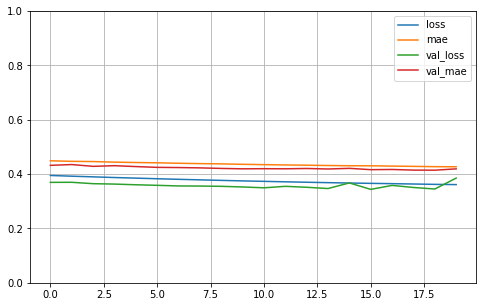

In [ ]:
pd.DataFrame(model_history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()